In [ ]:
#Q1
import yfinance as yf

In [36]:
tesla = yf.Ticker('TSLA')
Tesla_data=tesla.history()
Tesla_data.reset_index(inplace=True)
Tesla_data.head(5)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-09-30 00:00:00-04:00,259.040009,264.859985,255.770004,261.630005,80705700,0.0,0.0
1,2024-10-01 00:00:00-04:00,262.670013,263.980011,248.529999,258.019989,87397600,0.0,0.0
2,2024-10-02 00:00:00-04:00,247.550003,251.160004,241.500000,249.020004,93983900,0.0,0.0
3,2024-10-03 00:00:00-04:00,244.479996,249.789993,237.809998,240.660004,80729200,0.0,0.0
4,2024-10-04 00:00:00-04:00,246.690002,250.960007,244.580002,250.080002,86573200,0.0,0.0


In [ ]:
#Q2
import requests 
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"


html_data = requests.get(url)
soup = BeautifulSoup(html_data.content, 'html.parser')

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])


tables = soup.find_all('table')


for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        relevant_table = table
        break

for row in relevant_table.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) > 1:  
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(',', '').replace('$', '')
        
        if revenue:
           
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]



tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)


print(tesla_revenue.tail())         

<>:32: SyntaxWarning: invalid escape sequence '\$'
<>:32: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22324\3255971107.py:32: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
51  2009-09-30     46.0
52  2009-06-30     27.0


In [ ]:
#Q3
import yfinance as yf

In [ ]:

gme = yf.Ticker('GME')
gme_data=gme.history()
gme_data.reset_index(inplace=True)
gme_data.head(5)

In [10]:
#Q4
import requests 
from bs4 import BeautifulSoup
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"


html_data_2 = requests.get(url_gme)
soup_gme = BeautifulSoup(html_data_2.content, 'html.parser')

    
soup.find_all("tbody")[1]
    

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

tables_gme = soup_gme.find_all('table')


for table in tables_gme:
    if "GameStop Quarterly Revenue" in str(table):
        relevant_table_gme = table
        break

for row in relevant_table_gme.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) > 1:  
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)


gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)


gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]



gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)

print(gme_revenue.tail())

<>:32: SyntaxWarning: invalid escape sequence '\$'
<>:32: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22324\3802216653.py:32: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)


          Date  Revenue
57  2006-01-31   1667.0
58  2005-10-31    534.0
59  2005-07-31    416.0
60  2005-04-30    475.0
61  2005-01-31    709.0


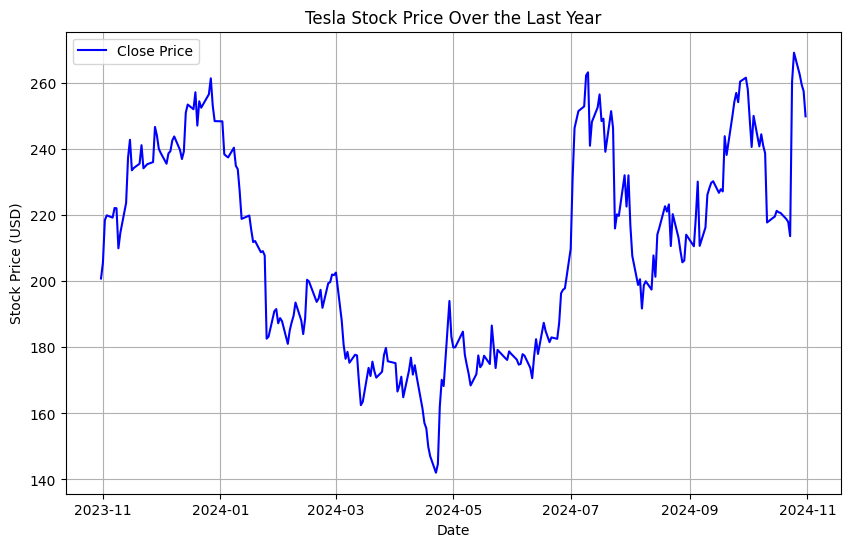

In [40]:
#Q5
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label="Close Price", color='blue')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")  
tesla_data.reset_index(inplace=True)  

make_graph(tesla_data, "Tesla Stock Price Over the Last Year")


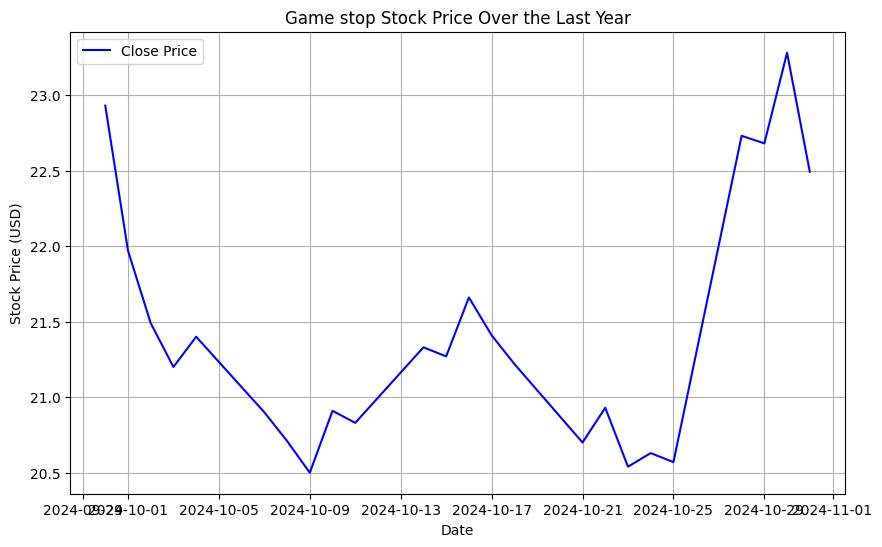

In [41]:
#Q6
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label="Close Price", color='blue')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

gme = yf.Ticker('GME')
gme_data=gme.history()
gme_data.reset_index(inplace=True)

make_graph(gme_data, "Game stop Stock Price Over the Last Year")